<a href="https://colab.research.google.com/github/FGalvao77/Analise-de-correlacao-com-dados-financeiros/blob/main/An%C3%A1lise_de_correla%C3%A7%C3%A3o_com_dados_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de correlação com dados financeiros**


---



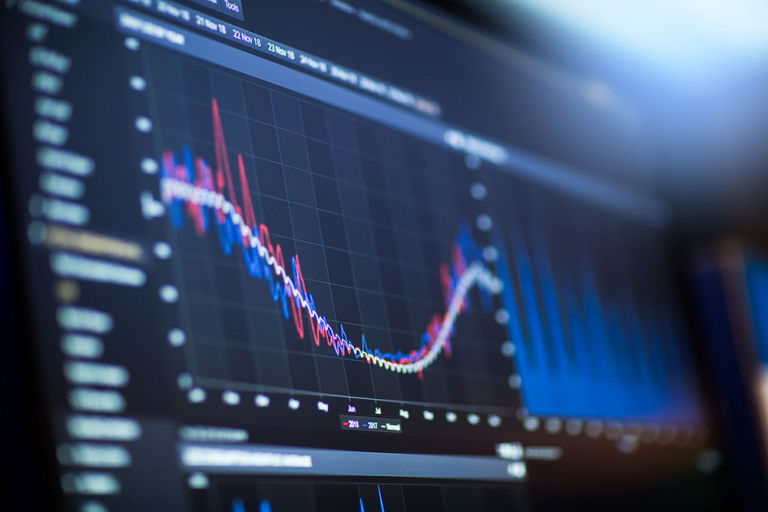

Iremos realizar análises de correlação de dados financeiros de empresas. 

Para isso utilizaremos uma biblioteca chamada `yfinance`, de código aberto que usa _APIs_ disponíveis publicamente do **[Yahoo!Ⓡ finance](https://finance.yahoo.com/)** e se destina a fins educacionais e de pesquisa.

- Link da documentação da API:
 - https://pypi.org/project/yfinance/


In [1]:
# instalando e atualizando a biblioteca "yfinance"
!pip install yfinance --upgrade

In [2]:
# importando as bibliotecas

import pandas as pd         # manipulação de dados
import numpy as np          # modelagem matemática
import yfinance as yf       # importação de dados financeiros

# visualização gráfica
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importando os conjunto de dados
data_1 = 'PBR' # Petróleo Brasileiro S.A. - Petrobras (PBR)
data_2 = 'ERJ' # Embraer S.A. (ERJ)

In [4]:
# instanciando os conjunto de dados no objeto "df"
df = yf.download([data_1, data_2])

[*********************100%***********************]  2 of 2 completed


In [5]:
# visualizando as 5 primeiras linhas
df.head()

Adj Close        Close         High  ... Low    Open       Volume    
                  ERJ PBR      ERJ PBR      ERJ  ... PBR     ERJ PBR      ERJ PBR
Date                                             ...                             
2000-07-21  12.493850 NaN  21.5625 NaN  21.6250  ... NaN  20.000 NaN  6454700 NaN
2000-07-24  12.783560 NaN  22.0625 NaN  22.2500  ... NaN  21.375 NaN  1416300 NaN
2000-07-25  13.181911 NaN  22.7500 NaN  23.2500  ... NaN  22.750 NaN   715300 NaN
2000-07-26  13.109484 NaN  22.6250 NaN  22.6875  ... NaN  22.250 NaN   266100 NaN
2000-07-27  13.109484 NaN  22.6250 NaN  22.8750  ... NaN  22.375 NaN   202200 NaN

[5 rows x 12 columns]

In [6]:
# visualizando as 5 últimas linhas
df.tail()

Adj Close             Close  ...   Open   Volume            
                  ERJ    PBR        ERJ  ...    PBR      ERJ         PBR
Date                                     ...                            
2021-12-22  16.660000  10.70  16.660000  ...  10.54  3168100  18132300.0
2021-12-23  17.180000  10.79  17.180000  ...  10.72  2595100  20399600.0
2021-12-27  17.350000  11.08  17.350000  ...  10.80  1109600  21628900.0
2021-12-28  17.340000  11.10  17.340000  ...  11.06  1771700  15797700.0
2021-12-29  17.110001  10.90  17.110001  ...  10.98  1137657  20333086.0

[5 rows x 12 columns]

In [7]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5395 entries, 2000-07-21 to 2021-12-29
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, ERJ)  5395 non-null   float64
 1   (Adj Close, PBR)  5381 non-null   float64
 2   (Close, ERJ)      5395 non-null   float64
 3   (Close, PBR)      5381 non-null   float64
 4   (High, ERJ)       5395 non-null   float64
 5   (High, PBR)       5381 non-null   float64
 6   (Low, ERJ)        5395 non-null   float64
 7   (Low, PBR)        5381 non-null   float64
 8   (Open, ERJ)       5395 non-null   float64
 9   (Open, PBR)       5381 non-null   float64
 10  (Volume, ERJ)     5395 non-null   int64  
 11  (Volume, PBR)     5381 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 547.9 KB


In [8]:
# eliminando as linhas com dados nulos/faltantes
df.dropna(inplace=True)

In [9]:
# visualizando se foram removidos as linhas com dados nulos/faltantes
df.isnull().sum()

Adj Close  ERJ    0
           PBR    0
Close      ERJ    0
           PBR    0
High       ERJ    0
           PBR    0
Low        ERJ    0
           PBR    0
Open       ERJ    0
           PBR    0
Volume     ERJ    0
           PBR    0
dtype: int64

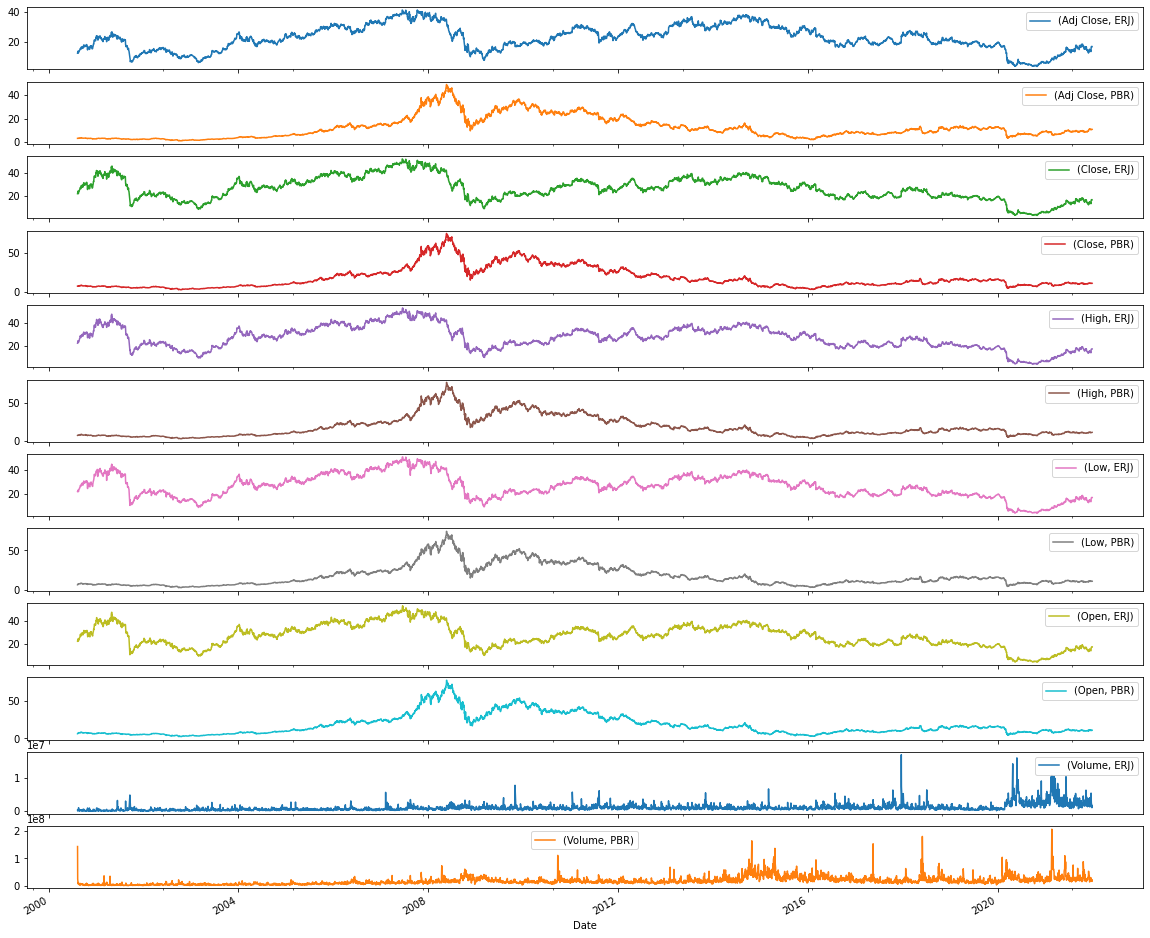

In [10]:
# gráfico de linha da série temporal
df.plot(subplots=True, figsize=(20,18));

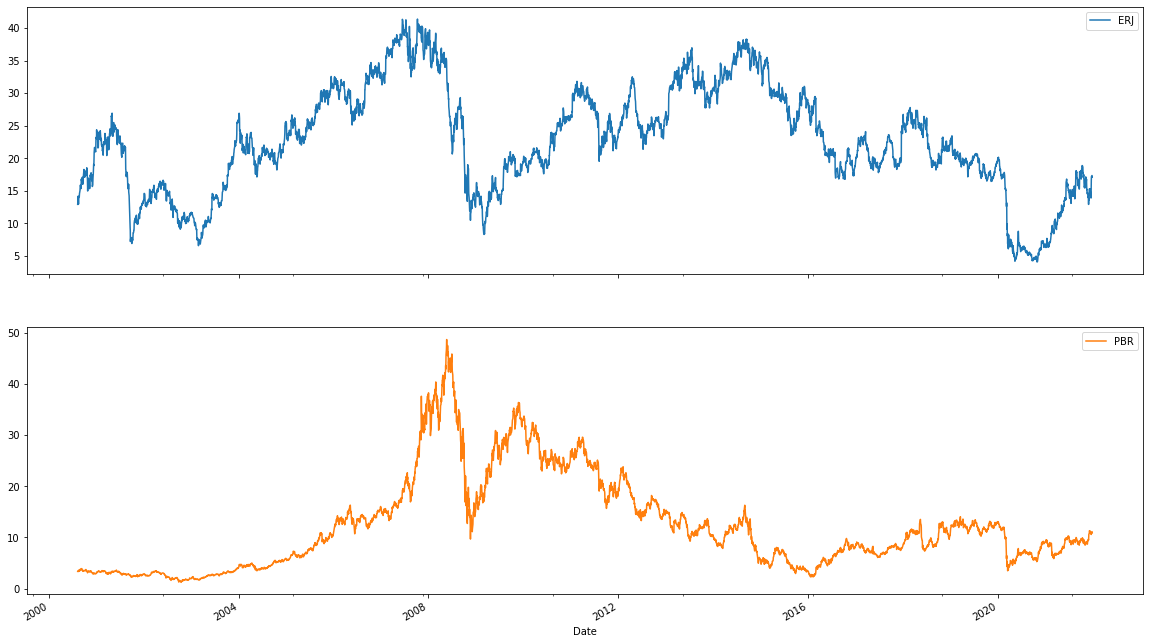

In [11]:
# gráfico de linha do atributo "Adj Close" (fechamento ajustado)
df['Adj Close'].plot(subplots=True, figsize=(20,12));

> Há uma tendência acontecendo em cada série temporal.

Podemos ter _uma correlação positiva, uma correlação negativa ou nenhuma_.

In [12]:
# instanciando o atributo "Adj Close" na variável "df_close"
df_close = df['Adj Close']

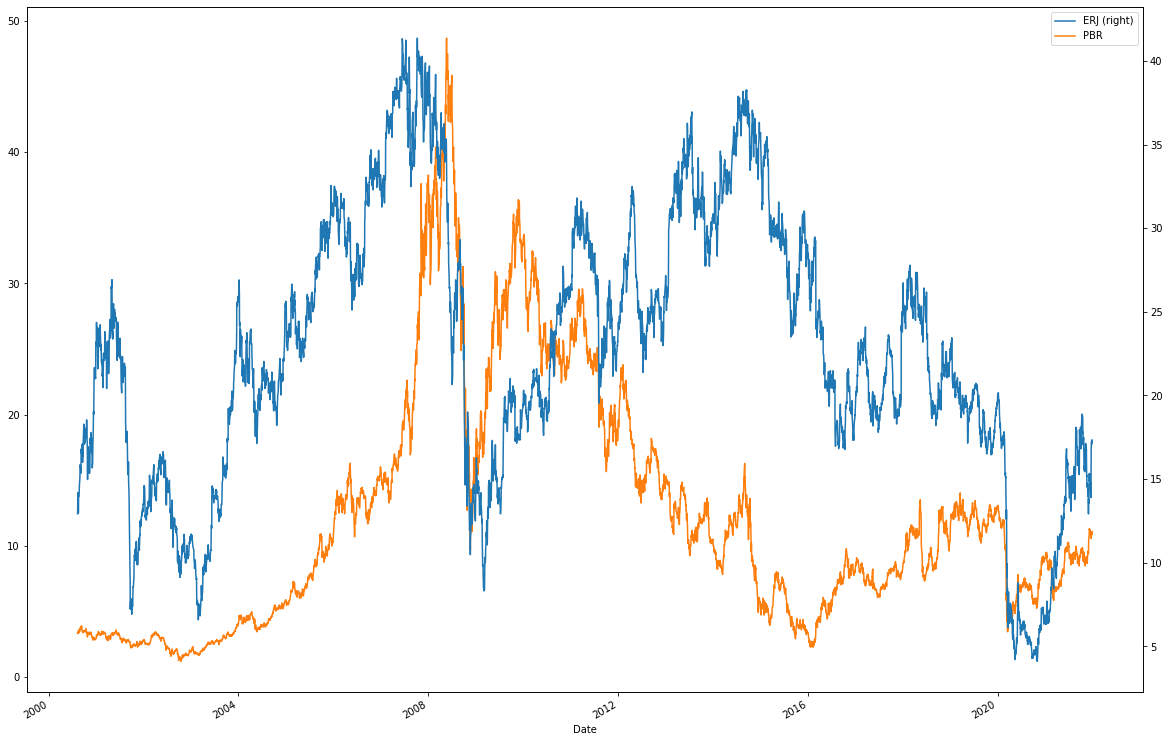

In [13]:
# gráfico de linha da série temporal
df_close.plot(secondary_y=data_2, figsize=(20,14));

In [14]:
# visualizando os índices
df_close.index

DatetimeIndex(['2000-08-10', '2000-08-11', '2000-08-14', '2000-08-15',
               '2000-08-16', '2000-08-17', '2000-08-18', '2000-08-21',
               '2000-08-22', '2000-08-23',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-27',
               '2021-12-28', '2021-12-29'],
              dtype='datetime64[ns]', name='Date', length=5381, freq=None)

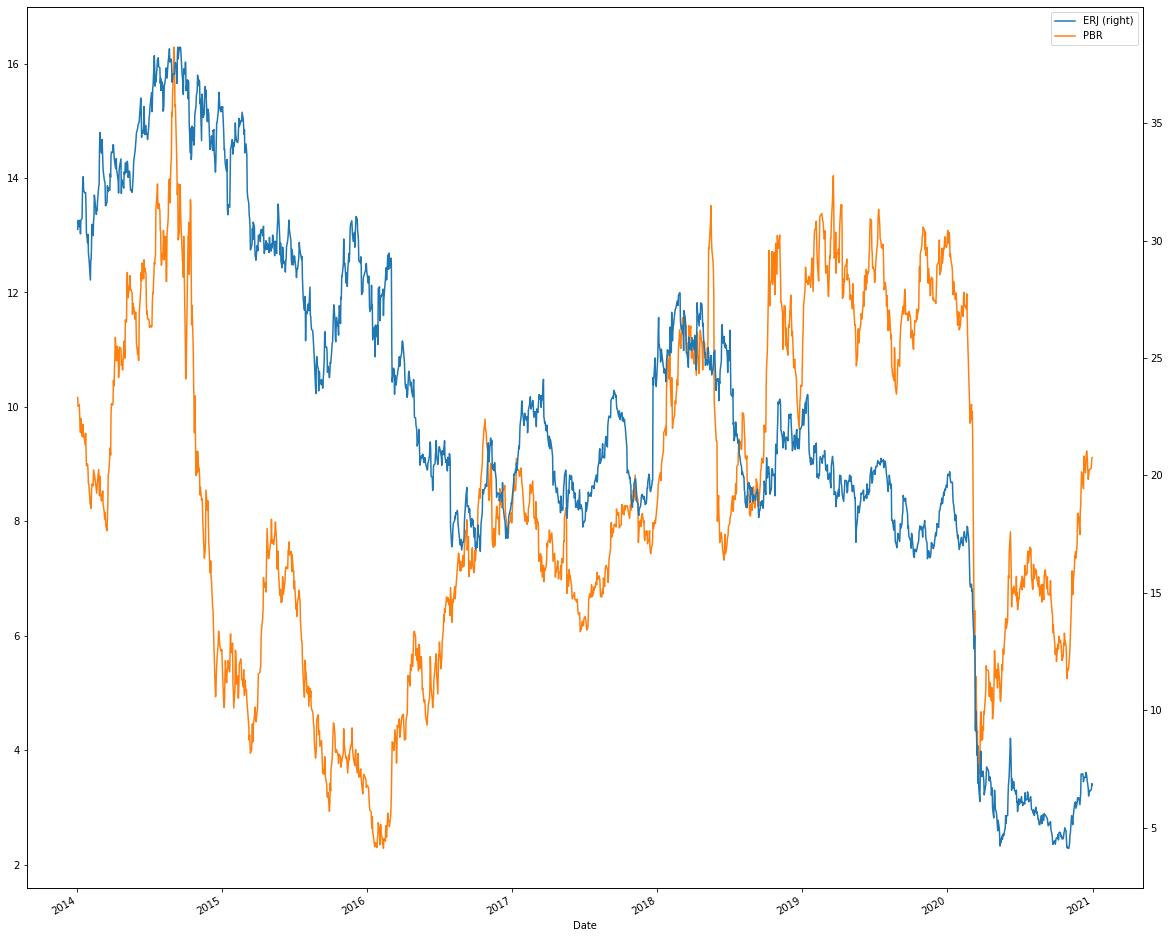

In [15]:
# gráfico de linha - recorte de tempo
df_close.loc['2014':'2020'].plot(secondary_y=data_2, figsize=(20,18));

In [16]:
# instanciando o recorte de tempo na variável "df_sm"
df_sm = df_close.loc['2014':'2020']

In [17]:
# aplicando a função de logaritmo na variável "df_sm" e dividindo pelo valor do dia seguinte
# e salvando o resultado na variável "rets"
rets = np.log(df_sm / df_sm.shift(1))

# removendo valores nulos e/ou faltantes
rets.dropna(inplace=True)

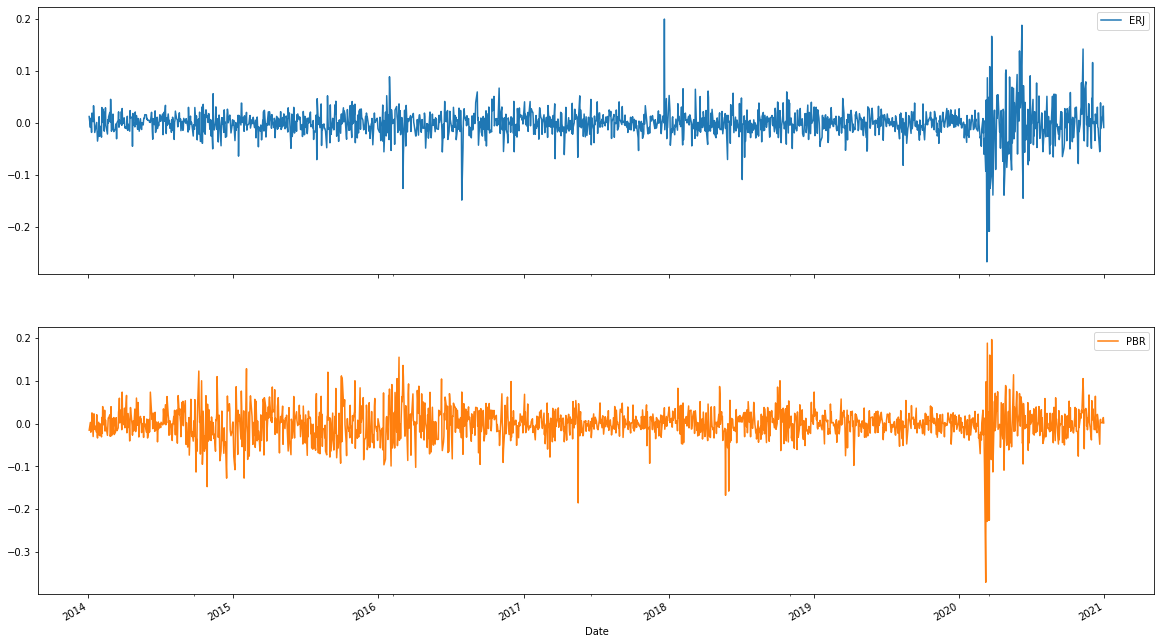

In [18]:
# plotando gráfico de linha da variável "rets"
rets.plot(subplots=True, figsize=(20,12));

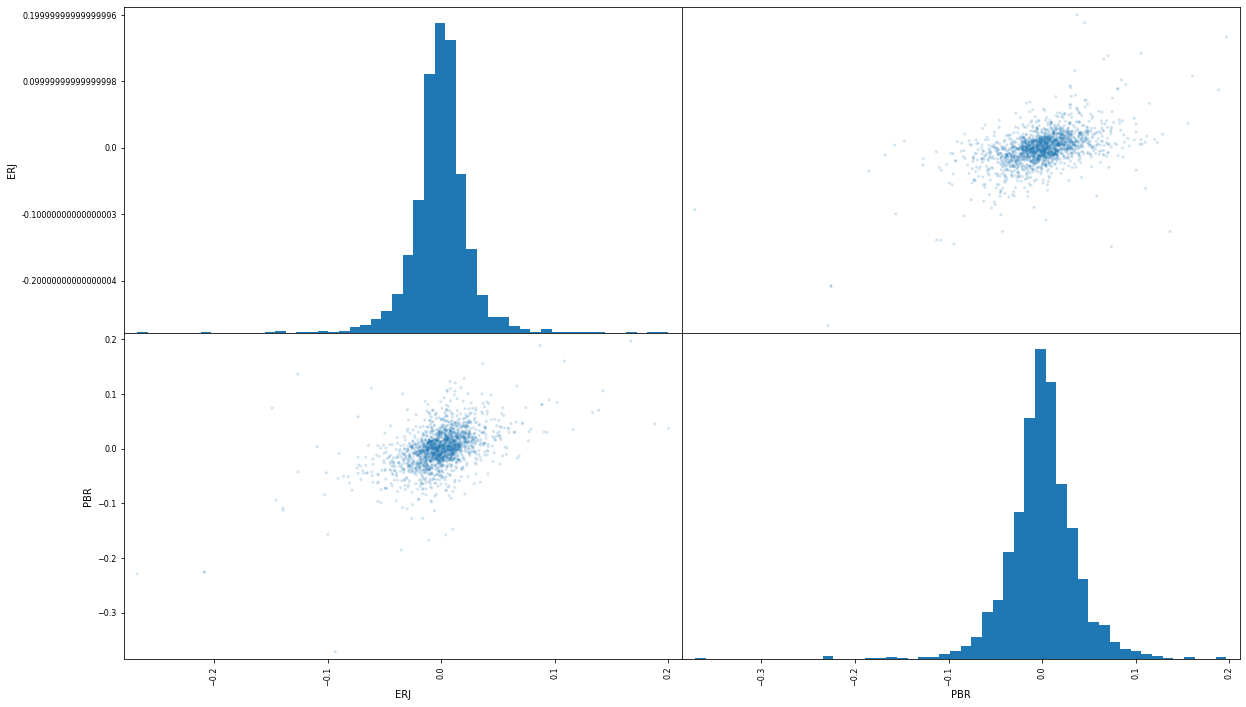

In [19]:
# plotando gráficos de histograma e de dispersão
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins':50},
                           figsize=(20,12));

## **OLS Regressão**

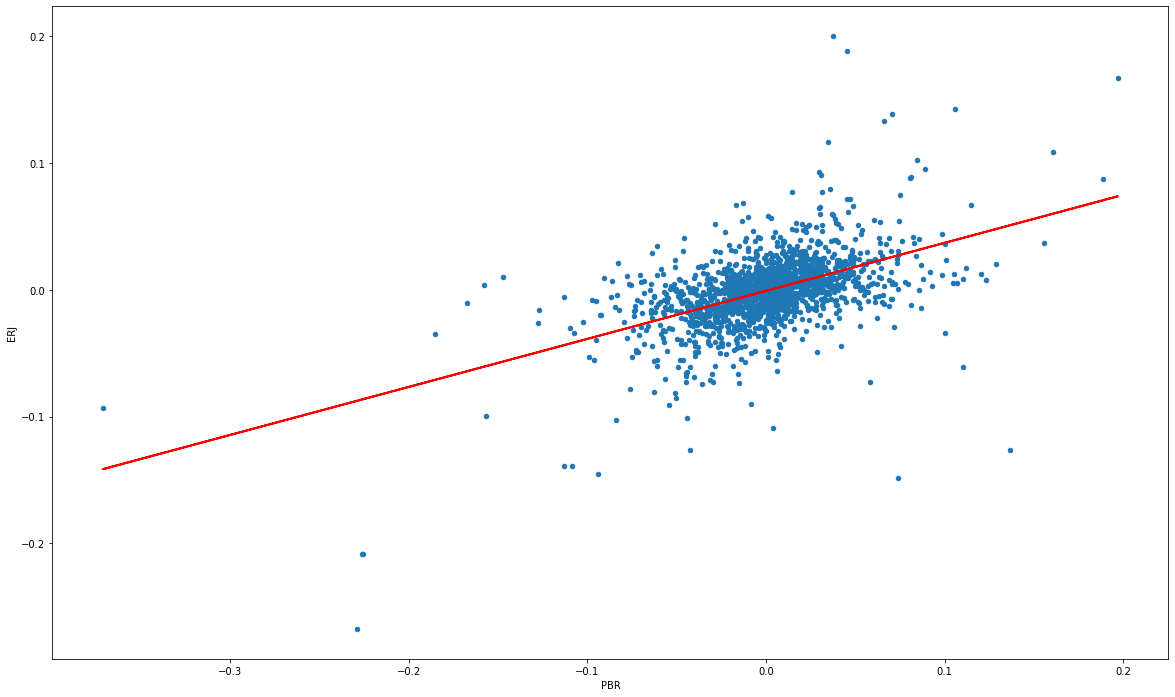

In [20]:
# gráfico de regressão
reg = np.polyfit(rets[data_1], 
                 rets[data_2], 
                 deg=1)

ax = rets.plot(kind='scatter', x=data_1, y=data_2, figsize=(20,12))
ax.plot(rets[data_1], np.polyval(reg, rets[data_1]), 'r', lw=2);

## **Correlação**

In [21]:
# correlação entre as variàveis
rets.corr()

,ERJ,PBR
ERJ,1.000000,0.507324
PBR,0.507324,1.000000


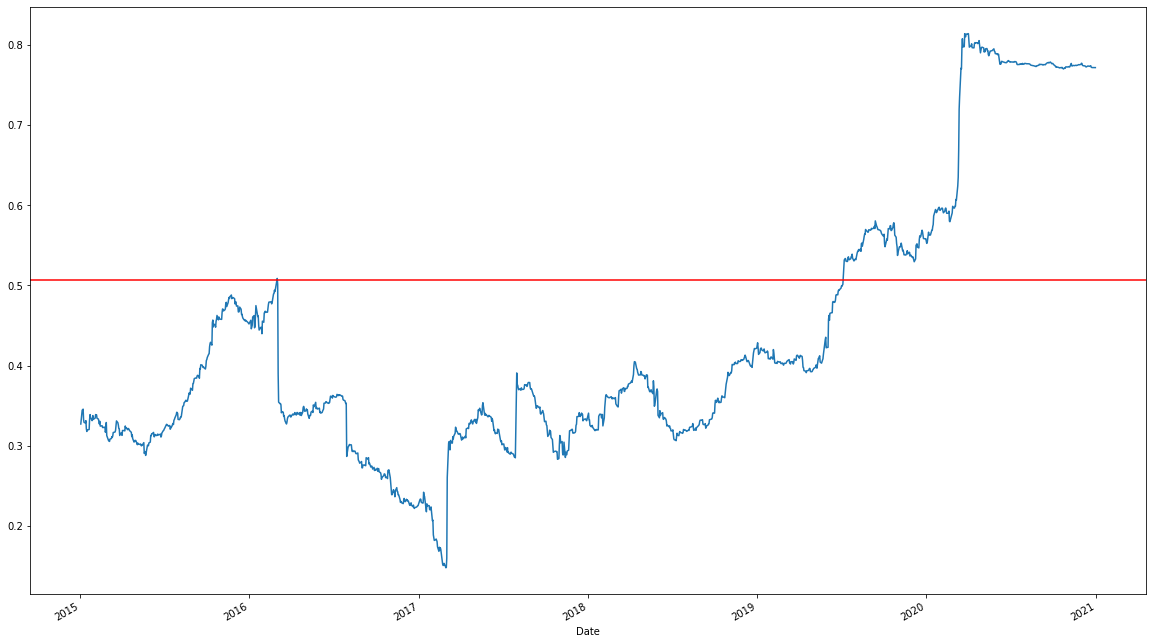

In [22]:
# gráfico de linha da correlação entre as variáveis da série temporal
ax = rets[data_1].rolling(window=252).corr(rets[data_2]).plot(figsize=(20,12))
ax.axhline(rets.corr().iloc[0,1], c='r');